In [1]:
from automata.base.automaton import Automaton
from automata.fa.dfa import DFA
from automata.fa.nfa import NFA
from visual_automata.fa.dfa import VisualDFA
from visual_automata.fa.nfa import VisualNFA

import random
import tkinter
from tkinter import *
from functools import partial
from tkinter import messagebox
from copy import deepcopy

In [2]:
nfa_roh = {"q0":{'0':{"q1",'q6'}, '1':{"q1","q3","q6",'q13','q21'}},
           "q1":{'0':{"q2"}, '1':{"q2"}},
           "q2":{'0':{"q0"}, '1':{"q0"}},
           "q3":{'1':{"q4"}},
           "q4":{'1':{"q5"}},
           "q5":{'0':{"q5"},'1':{"q5"}},
           "q6":{'0':{"q7"}, '1':{"q7"}},
           "q7":{'1':{"q8"}},
           "q8":{'0':{"q9"}, '1':{"q9"}},
           "q9":{'0':{"q10"}, '1':{"q10"}},
           "q10":{'1':{"q11"}},
           "q11":{'0':{"q12"}, '1':{"q12"}},
           "q12":{'1':{"q29"}},
           "q13":{'0':{"q14"}, '1':{"q14"}},
           "q14":{'0':{"q15"}, '1':{"q15"}},
           "q15":{'0':{"q16"}, '1':{"q16"}},
           "q16":{'1':{"q17"}},
           "q17":{'0':{"q18"}, '1':{"q18"}},
           "q18":{'0':{"q19"}, '1':{"q19"}},
           "q19":{'0':{"q20"}, '1':{"q20"}},
           "q20":{'1':{"q29"}},
           "q19":{'0':{"q20"}, '1':{"q20"}},
           "q21":{'0':{"q22"}, '1':{"q22"}},
           "q22":{'0':{"q23"}, '1':{"q23"}},
           "q23":{'1':{"q24"}},
           "q24":{'0':{"q25"}, '1':{"q25"}},
           "q25":{'0':{"q26"}, '1':{"q26"}},
           "q26":{'1':{"q27"}},
           "q27":{'0':{"q28"}, '1':{"q28"}},
           "q28":{'0':{"q29"}, '1':{"q29"}},
           "q29":{}
}


nfa = NFA(
    states={"q0","q1","q2","q3","q4","q5","q6","q7","q8","q9","q10","q11","q12","q13","q14","q15","q16","q17","q18","q19","q20","q21","q22","q23","q24","q25","q26","q27","q28","q29"},
    input_symbols={'0', '1'},
    transitions=nfa_roh,
    initial_state='q0',
    final_states={'q29','q5'}
)

dfa = DFA.from_nfa(nfa)

min_dfa = VisualDFA(dfa.minify(retain_names=False))

In [ ]:
VisualNFA(nfa).show_diagram

[Accepted]                         
Step: Current state: Input symbol: New state:
1                →q0             1        q13
2                q13             0        q14
3                q14             1        q15
4                q15             0        q16
5                q16             1        q17
6                q17             0        q18
7                q18             0        q19
8                q19             0        q20
9                q20             1       *q29

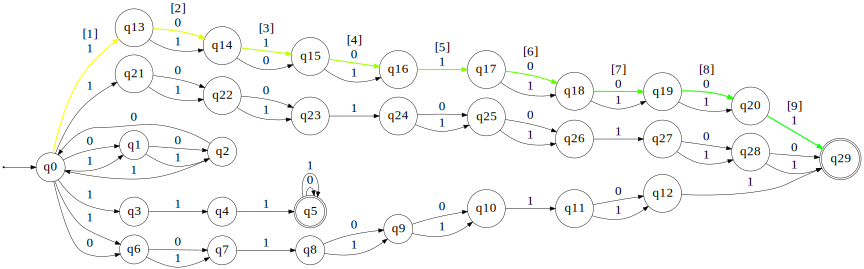

In [18]:
VisualNFA(nfa).show_diagram('101010001',fig_size= (12,12),
        font_size = 30.0,
        arrow_size = 1.2,
        state_seperation = 1,filename='RejectedNFA')

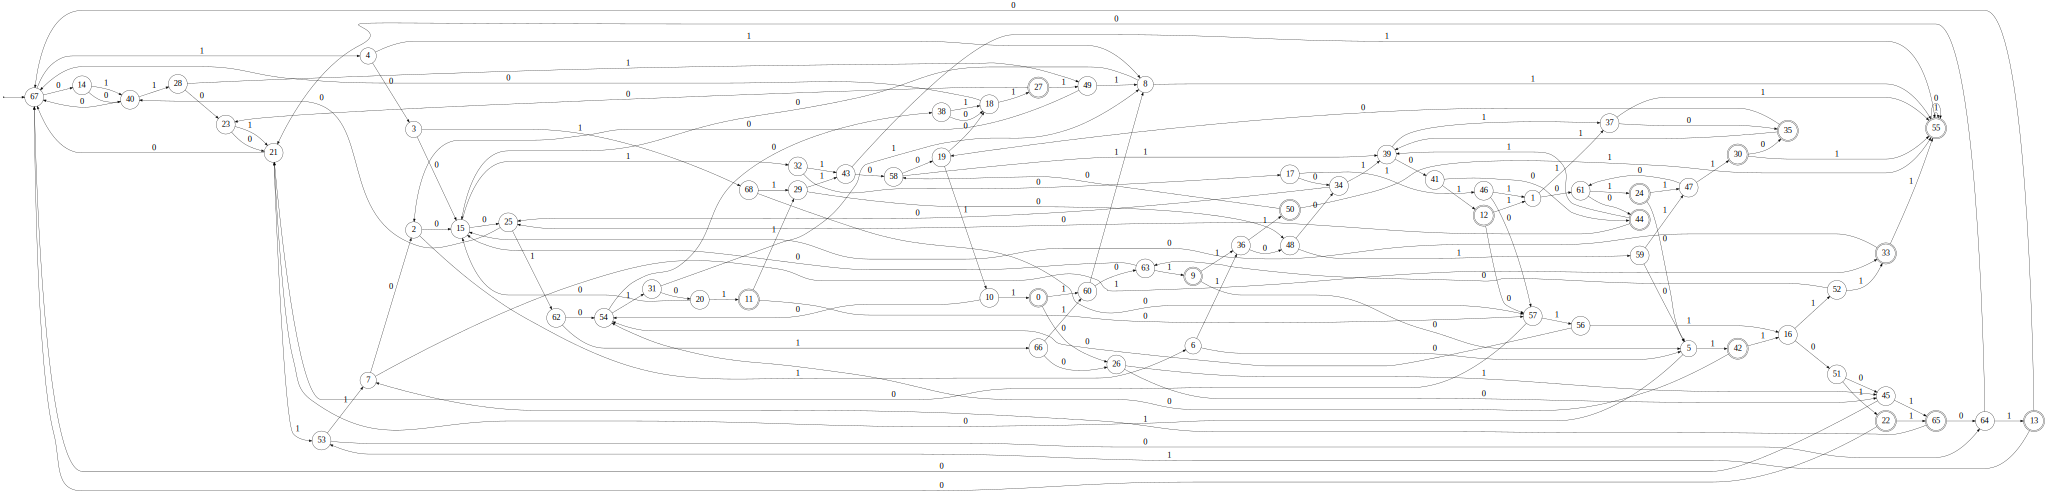

In [8]:
min_dfa.show_diagram(filename='minDFA',fig_size= (30, 30),
        font_size = 30.0,
        arrow_size = 1,
        state_seperation = 1)

In [20]:
min_dfa.table.to_csv("transition_v2.csv")

[Accepted]                         
Step: Current state: Input symbol: New state:
1                →67             1          4
2                  4             0          3
3                  3             1         68
4                 68             0         57
5                 57             1         56
6                 56             0         54
7                 54             0         38
8                 38             0         18
9                 18             1        *27

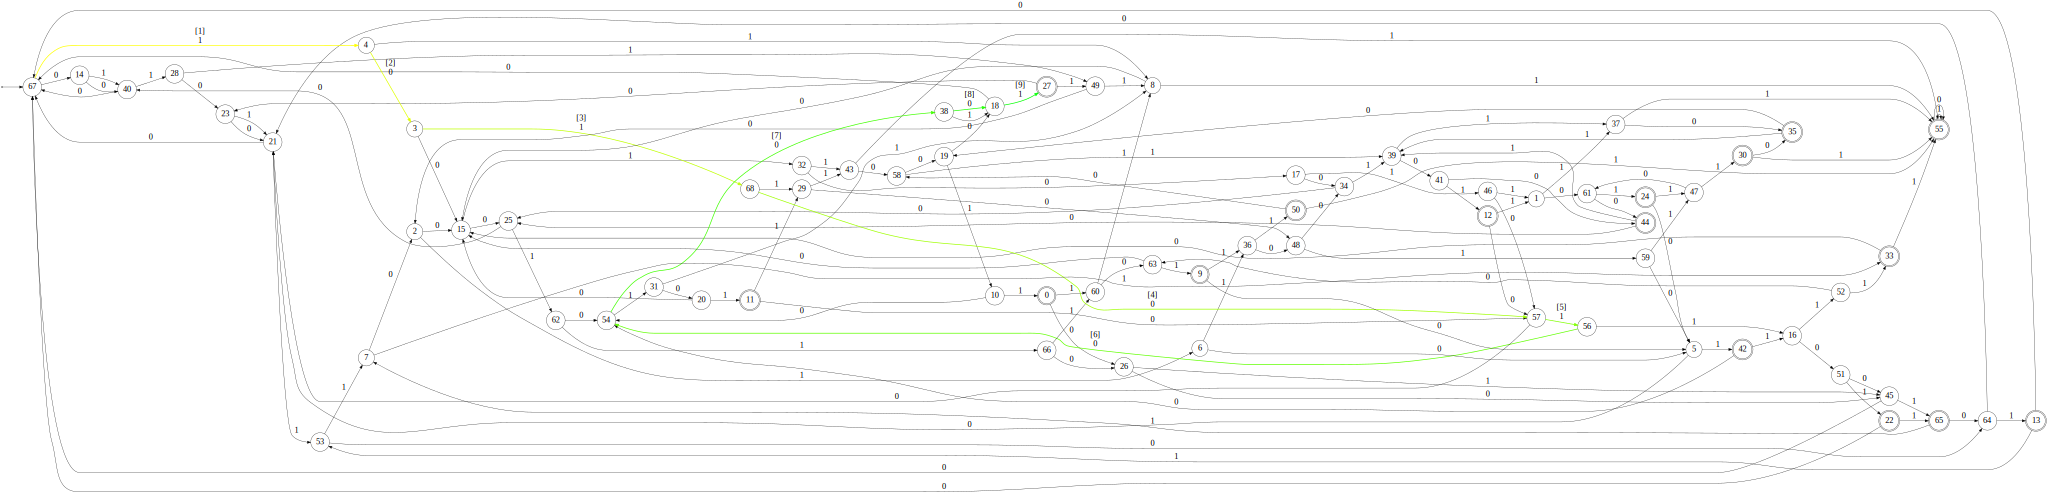

In [25]:
min_dfa.show_diagram('101010001',fig_size= (30,40),
        font_size = 30.0,
        arrow_size = 1.2,
        state_seperation = 1)

In [19]:
# sign variable to decide the turn of which player
sign = 0
  
# Creates an empty board
global board
board = [[" " for x in range(3)] for y in range(3)]
  
def mani(x,p):
    return ''.join([str(elem) for elem in np.array(x).flatten()]).replace(p,"1").replace(" ","0").replace("X","0").replace("O","0")

def winner(x,p):
    return accepts(min_dfa,mani(x,p))

def accepts(X,s):
    a = X.input_check(s)
    if list(a.to_dict().items())[0][0][0].replace('[','').replace(']','') == 'Rejected':
        return False
    else:
        return True
    
# Configure text on button while playing with another player
def get_text(i, j, gb, l1, l2):
    global sign,board
    if board[i][j] == ' ':
        if sign % 2 == 0:
            l1.config(state=DISABLED)
            l2.config(state=ACTIVE)
            board[i][j] = "X"
        else:
            l2.config(state=DISABLED)
            l1.config(state=ACTIVE)
            board[i][j] = "O"
        sign += 1
        button[i][j].config(text=board[i][j])
    if winner(board, "X"):
        gb.destroy()
        box = messagebox.showinfo("Winner", "Player 1 won the match")
    elif winner(board, "O"):
        gb.destroy()
        box = messagebox.showinfo("Winner", "Player 2 won the match")
    elif(isfull()):
        gb.destroy()
        box = messagebox.showinfo("Tie Game", "Tie Game")

# Check if the player can push the button or not
def isfree(i, j):
    return board[i][j] == " "
  
# Check the board is full or not
def isfull():
    flag = True
    for i in board:
        if(i.count(' ') > 0):
            flag = False
    return flag
  
# Create the GUI of game board for play along with another player
def gameboard_pl(game_board, l1, l2):
    global button
    button = []
    for i in range(3):
        m = 3+i
        button.append(i)
        button[i] = []
        for j in range(3):
            n = j
            button[i].append(j)
            get_t = partial(get_text, i, j, game_board, l1, l2)
            button[i][j] = Button(
                game_board, bd=5, command=get_t, height=4, width=8)
            button[i][j].grid(row=m, column=n)
    game_board.mainloop()

# Configure text on button while playing with system
def get_text_pc(i, j, gb, l1, l2):
    global sign,test
    if board[i][j] == ' ':
        if sign % 2 == 0:
            l1.config(state=DISABLED)
            l2.config(state=ACTIVE)
            board[i][j] = "X"
        else:
            button[i][j].config(state=ACTIVE)
            l2.config(state=DISABLED)
            l1.config(state=ACTIVE)
            board[i][j] = "O"
        sign += 1
        button[i][j].config(text=board[i][j])
    x = True
    if winner(board, "X"):
        test = board
        gb.destroy()
        x = False
        box = messagebox.showinfo("Winner", "Player won the match")
    elif winner(board, "O"):
        gb.destroy()
        x = False
        box = messagebox.showinfo("Winner", "Computer won the match")
    elif(isfull()):
        gb.destroy()
        x = False
        box = messagebox.showinfo("Tie Game", "Tie Game")
    if(x):
        if sign % 2 != 0:
            move = pc()
            button[move[0]][move[1]].config(state=DISABLED)
            get_text_pc(move[0], move[1], gb, l1, l2)

    
# Initialize the game board to play with another player
def withplayer(game_board):
    game_board.destroy()
    game_board = Tk()
    game_board.title("Tic Tac Toe")
    l1 = Button(game_board, text = "Player 1 : X", width = 10)
      
    l1.grid(row = 1, column = 1)
    l2 = Button(game_board, text = "Player 2 : O", 
                width = 10, state = DISABLED)
      
    l2.grid(row = 2, column = 1)
    gameboard_pl(game_board, l1, l2)

# main function
def play():
    menu = Tk()
    menu.geometry("250x250")
    menu.title("Tic Tac Toe")
    wpl = partial(withplayer, menu)
      
    head = Button(menu, text = "---Welcome to tic-tac-toe---",
                  activeforeground = 'red',
                  activebackground = "black", bg = "red", 
                  fg = "black", width = 500, font = 'summer', bd = 5)
      
    B2 = Button(menu, text = "Multi Player", command = wpl, activeforeground = 'red',
                activebackground = "black", bg = "red", fg = "black",
                width = 500, font = 'summer', bd = 5)
      
    B3 = Button(menu, text = "Exit", command = menu.quit, activeforeground = 'red',
                activebackground = "black", bg = "red", fg = "black",
                width = 500, font = 'summer', bd = 5)
    
    head.pack(side = 'top')
    B2.pack(side = 'top')
    B3.pack(side = 'top')
    menu.mainloop()
    return board
  
# Call main function
if __name__ == '__main__':
    x = play()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Board Status

In [20]:
for i in x:
    print(i)

['X', 'O', 'O']
[' ', 'X', ' ']
[' ', ' ', 'X']


## Player - 2 : String Input for DFA

In [21]:
mani(x,"O")

<IPython.core.display.Javascript object>

'011000000'

## Player - 1 : String Input for DFA

In [22]:
mani(x,"X")

<IPython.core.display.Javascript object>

'100010001'

## DFA status for O

<IPython.core.display.Javascript object>

[Rejected]                         
Step: Current state: Input symbol: New state:
1                 →8             0         36
2                 36             1         56
3                 56             1         38
4                 38             0         21
5                 21             0         33
6                 33             0         →8
7                 →8             0         36
8                 36             0         56
9                 56             0         →8

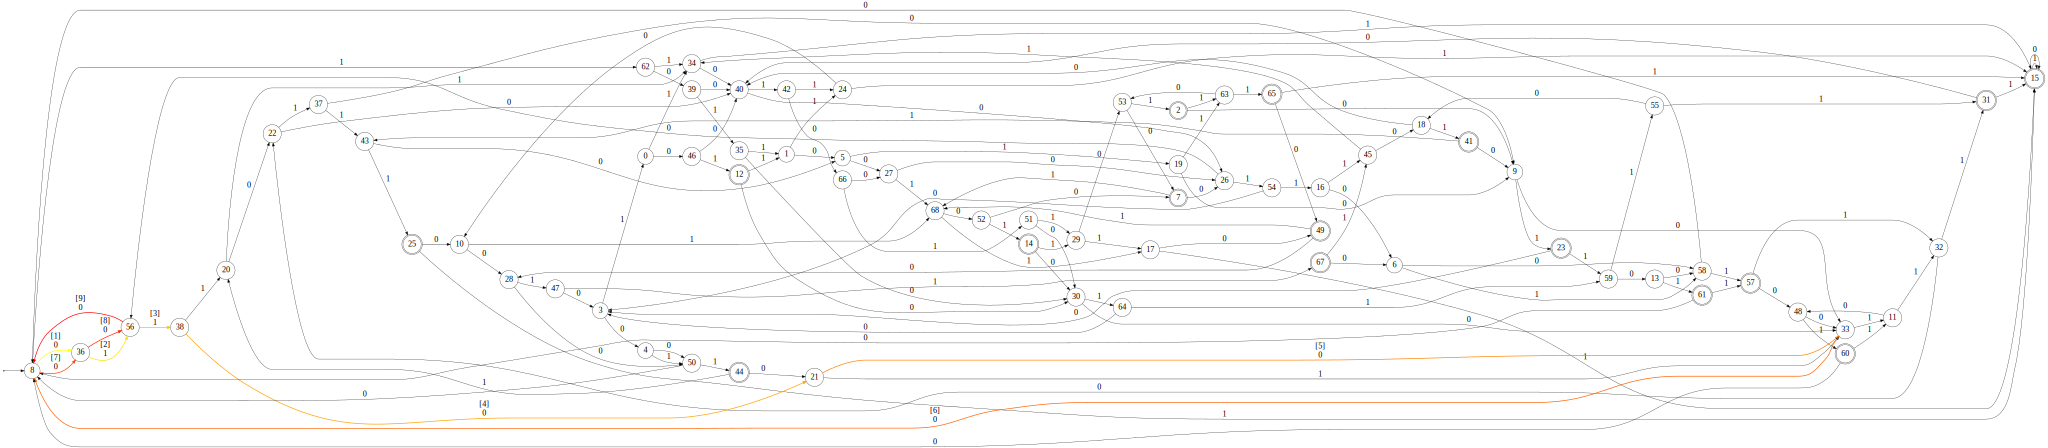

In [23]:
min_dfa.show_diagram(mani(x,"O"),fig_size= (40, 40),
        font_size = 30.0,
        arrow_size = 1.2,
        state_seperation = 1)

## DFA status for X

<IPython.core.display.Javascript object>

[Accepted]                         
Step: Current state: Input symbol: New state:
1                 →8             1         62
2                 62             0         39
3                 39             0         40
4                 40             0         26
5                 26             1         54
6                 54             0          3
7                  3             0          4
8                  4             0         50
9                 50             1        *44

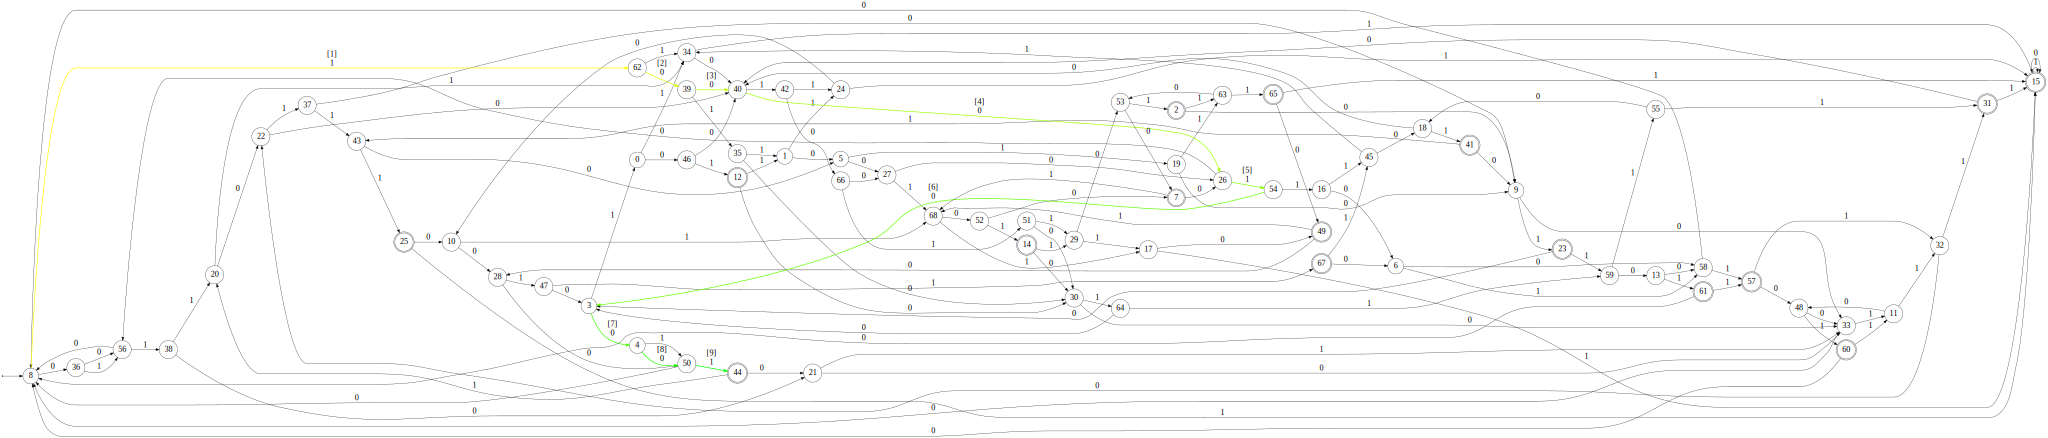

In [24]:
min_dfa.show_diagram(mani(x,"X"),fig_size= (40, 40),
        font_size = 30.0,
        arrow_size = 1.2,
        state_seperation = 1)